<a href="https://colab.research.google.com/github/Kavyasree-351/ML-sprintronics-phy/blob/main/Synapses1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q numpy matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


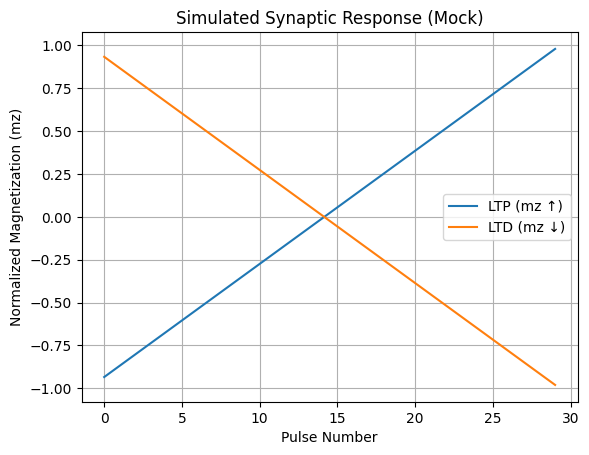

In [ ]:
def simulate_synapse(pulses=30, step=0.066, start=-1, mode='ltp'):
    """Simulate mz evolution for LTP or LTD"""
    mz = []
    value = start
    for _ in range(pulses):
        if mode == 'ltp':
            value = min(1, value + step)
        elif mode == 'ltd':
            value = max(-1, value - step)
        mz.append(value)
    return mz
    # Plot LTP and LTD
ltp = simulate_synapse(mode='ltp')
ltd = simulate_synapse(start=1, mode='ltd')

plt.plot(ltp, label='LTP (mz ↑)')
plt.plot(ltd, label='LTD (mz ↓)')
plt.xlabel('Pulse Number')
plt.ylabel('Normalized Magnetization (mz)')
plt.title('Simulated Synaptic Response (Mock)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def Q1(x, q1=0.2, theta=1):
    return theta if x > q1 else (-theta if x < -q1 else 0)

def Q2(x, q2=0.2, theta=1):
    return theta if x > q2 else (-theta if x < -q2 else 0)

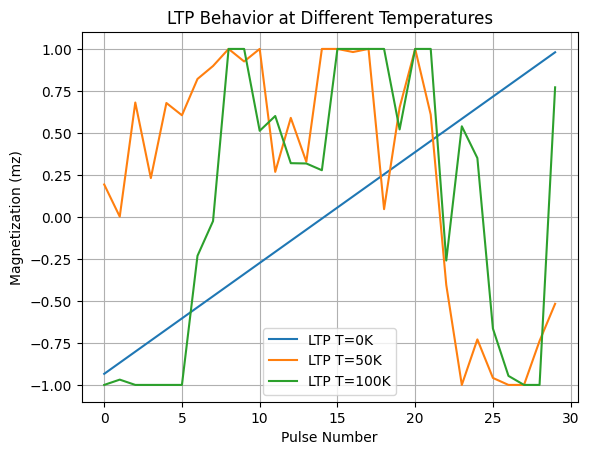

In [ ]:
def simulate_synapse_with_noise(pulses=30, step=0.066, start=-1, mode='ltp', temperature=0):
    """Simulate LTP or LTD with thermal noise (higher temperature = more randomness)"""
    mz = []
    value = start
    for _ in range(pulses):
        noise = np.random.normal(0, temperature * 0.01)
        if mode == 'ltp':
            value = min(1, value + step + noise)
        elif mode == 'ltd':
            value = max(-1, value - step + noise)
        value = np.clip(value, -1, 1)
        mz.append(value)
    return mz

# Plot noisy synapse responses
temps = [0, 50, 100]
for T in temps:
    noisy_ltp = simulate_synapse_with_noise(temperature=T, mode='ltp')
    plt.plot(noisy_ltp, label=f'LTP T={T}K')
plt.title("LTP Behavior at Different Temperatures")
plt.xlabel("Pulse Number")
plt.ylabel("Magnetization (mz)")
plt.legend()
plt.grid(True)
plt.show()


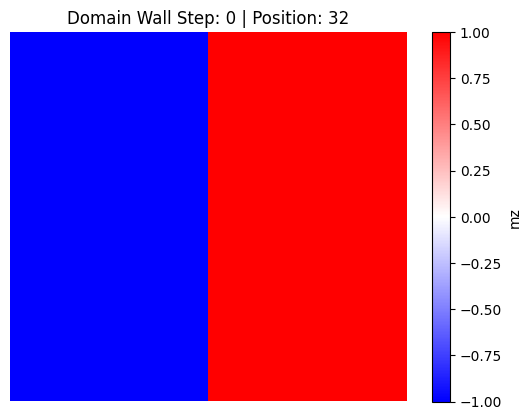

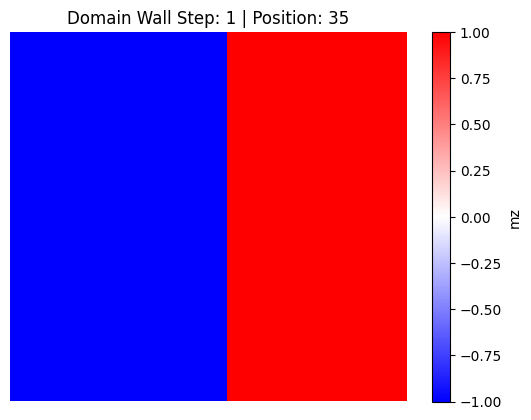

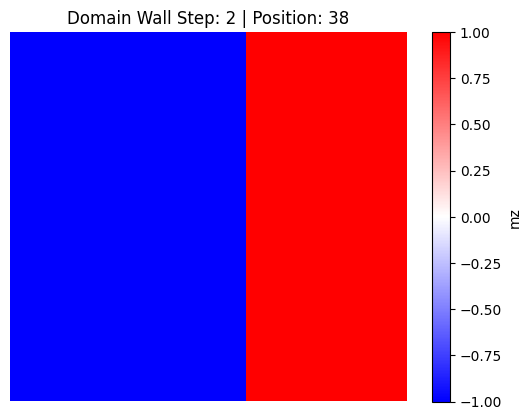

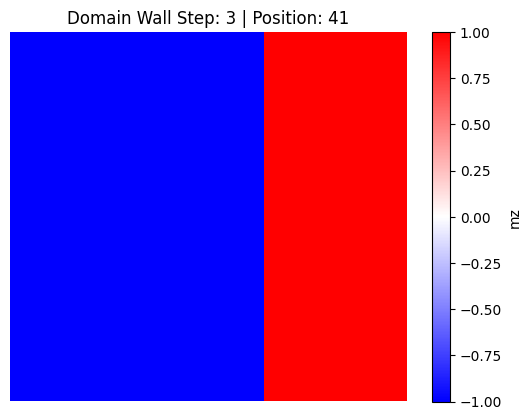

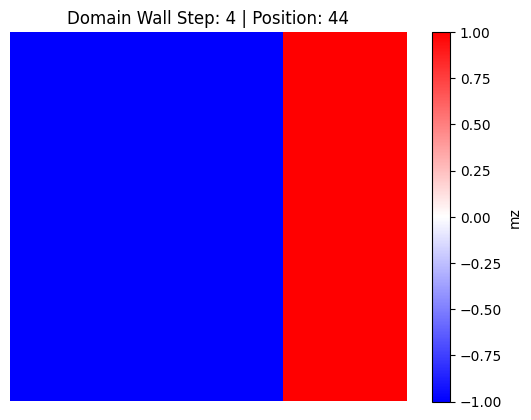

In [ ]:
def visualize_domain_wall(step, width=64, wall_position=32):
    domain = np.ones((8, width))
    domain[:, :wall_position] = -1
    plt.imshow(domain, cmap='bwr', aspect='auto')
    plt.title(f"Domain Wall Step: {step} | Position: {wall_position}")
    plt.axis('off')
    plt.colorbar(label='mz')
    plt.show()

# Show motion across several steps
for step in range(5):
    visualize_domain_wall(step, wall_position=32 + step * 3)


In [ ]:
W1 = np.random.uniform(-0.5, 0.5, (10, 4))  # 10 input → 4 hidden

In [ ]:
import pickle

def save_weights(W1, W2, filename="synapse_weights.pkl"):
    with open(filename, 'wb') as f:
        pickle.dump((W1, W2), f)

def load_weights(filename="synapse_weights.pkl"):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Example usage
# save_weights(W1, W2)
# W1, W2 = load_weights()


Hook in MNIST (Mini Version) to Replace **XOR**

Thermal Noise to Your LTP/LTD Simulation

In [ ]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0, 1, 1, 0])

In [ ]:
np.random.seed(0)
W1 = np.random.uniform(-0.5, 0.5, (2, 4))  # 2 input → 4 hidden
W2 = np.random.uniform(-0.5, 0.5, (4, 1))  # 4 hidden → 1 output

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x)**2

In [ ]:
epochs = 100
learning_rate = 1.0
q1 = q2 = 0.2
theta1 = theta2 = 0.1

losses = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x = X[i]
        target = Y[i]

        # Forward pass
        z1_raw = np.dot(x, W1)
        z1 = tanh(z1_raw)
        y_raw = np.dot(z1, W2)
        y = tanh(y_raw)

        # Compute error
        error = target - y
        total_error += error**2

        # Backprop with Q1/Q2 thresholding
        delta2 = Q2(float(learning_rate * error * tanh_deriv(y_raw)), q2, theta2)
        delta1 = [Q2(float(learning_rate * delta2 * W2[j][0] * tanh_deriv(z1_raw[j])), q2, theta2) for j in range(4)]

        # Weight updates with Q1
        for j in range(4):
            dW2 = delta2 * Q1(z1[j], q1, theta1)
            W2[j][0] += dW2

        for j in range(2):
            for k in range(4):
                dW1 = delta1[k] * Q1(x[j], q1, theta1)
                W1[j][k] += dW1

    losses.append(total_error)

<ipython-input-11-7ef3784400ef>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta2 = Q2(float(learning_rate * error * tanh_deriv(y_raw)), q2, theta2)


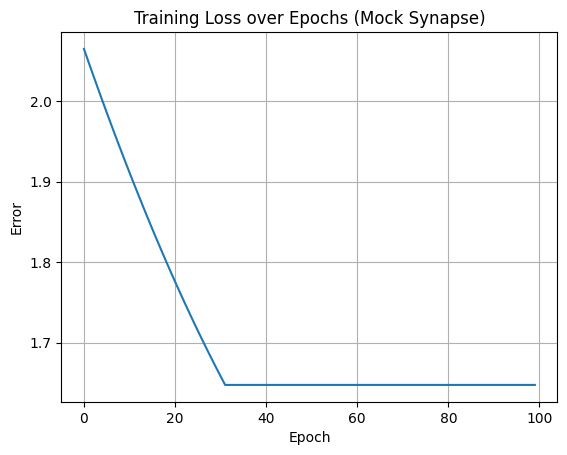

In [ ]:
plt.plot(losses)
plt.title('Training Loss over Epochs (Mock Synapse)')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid(True)
plt.show()

In [ ]:
#Code by Subhasis
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


input_size = 3
hidden_size = 4
output_size = 1

np.random.seed(42)  # for reproducibility
w = np.random.randn(input_size, hidden_size)     # weights from input to hidden
v = np.random.randn(hidden_size, output_size)    # weights from hidden to output

X = np.array([[0.2, 0.4, 0.6]])
y = np.array([[1]])

lr = 0.1

z1 = np.dot(X, w)
a1 = sigmoid(z1)

z2 = np.dot(a1, v)
a2 = sigmoid(z2)

error_output = y - a2
delta_output = error_output * sigmoid_derivative(a2)


error_hidden = delta_output.dot(v.T)
delta_hidden = error_hidden * sigmoid_derivative(a1)


v += a1.T.dot(delta_output) * lr
w += X.T.dot(delta_hidden) * lr


print("Predicted Output:", a2)
print("Updated weights (input to hidden):\n", w)
print("Updated weights (hidden to output):\n", v)


Predicted Output: [[0.08755483]]
Updated weights (input to hidden):
 [[ 0.49680068 -0.13895442  0.64709517  1.52283047]
 [-0.23398031 -0.23551719  1.57802607  0.76703595]
 [-0.4692148   0.5404897  -0.46519781 -0.46632792]]
Updated weights (hidden to output):
 [[ 0.24510718]
 [-1.90926464]
 [-1.72040934]
 [-0.55804304]]
